# Interview Practice

In [6]:
class Person:
    def __init__(self, name, age) -> None:
        self.name = name
        self.age = age

    def print_age(self):
        print(self.age)
 

In [7]:
John = Person('John', 36)
John.print_age()

36


In [18]:
type(test_target)

int

In [28]:
test_case = [2,7,11,15]
test_target = 9

def twoSum(nums: list[int], target: int) -> list[int]:
        x_counter = 0
        y_counter = 0
        for x in range(len(nums)):
            y_counter = x+1
            for y in range(len(nums[y_counter:])):
                if ((nums[x] + nums[y_counter]) == target):
                    return [x, y_counter]
                else:
                    y_counter += 1

In [29]:
twoSum(test_case, test_target)

[0, 1]

# A/B Testing
https://www.kaggle.com/code/ekrembayar/a-b-testing-step-by-step-hypothesis-testing/notebook

The data is from 90,189 players that installed the game while the AB-test was running. 

The variables are:

* userid - a unique number that identifies each player.
* version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first week after installation
* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cookie_cats.csv')
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [59]:
from scipy.stats import shapiro
import scipy.stats as stats

In [60]:
pd.set_option('display.max_columns', None)

In [66]:
# Summary Statistics of Sum Gamerounds Control vs Treatment
df.groupby('version').sum_gamerounds.agg(['count', 'median', 'mean', 'std', 'max'])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


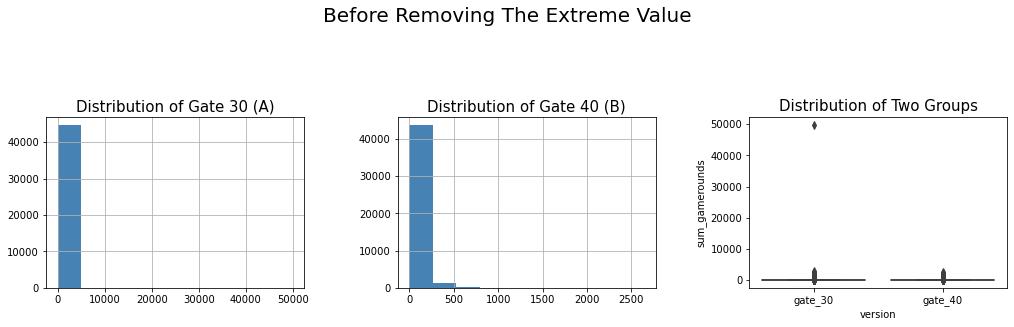

In [74]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
df[(df.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
df[(df.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = df.version, y = df.sum_gamerounds, ax = axes[2])

plt.suptitle("Before Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

<AxesSubplot:xlabel='sum_gamerounds', ylabel='Count'>

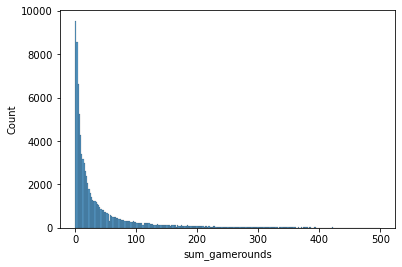

In [79]:
sns.histplot(data = df[df.sum_gamerounds < 500], x="sum_gamerounds")

In [84]:
df.groupby("sum_gamerounds").userid.count().reset_index().head(20)
# df.groupby("sum_gamerounds").userid.count().loc[[30,40]]

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [87]:
# Retention Problem
pd.DataFrame({"RET1_COUNT": df["retention_1"].value_counts(),
              "RET7_COUNT": df["retention_7"].value_counts(),
              "RET1_RATIO": df["retention_1"].value_counts() / len(df),
              "RET7_RATIO": df["retention_7"].value_counts() / len(df)})

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50036,73408,0.55479,0.813935
True,40153,16781,0.44521,0.186065


In [88]:
df.groupby(['version', 'retention_1']).sum_gamerounds.aggregate(['count', 'median', 'mean', 'std', 'max'])

count  median       mean         std    max
version retention_1                                             
gate_30 False        24666     6.0  18.379591  319.423232  49854
        True         20034    48.0  94.411700  135.037697   2961
gate_40 False        25370     6.0  16.340402   35.925756   1241
        True         20119    49.0  95.381182  137.887256   2640

In [1]:
df.groupby(['version', 'retention_7'], as_index = False).sum_gamerounds.aggregate(['count', 'median', 'mean', 'std', 'max'])

NameError: name 'df' is not defined

In [91]:
df[(df.retention_1 == True) & (df.retention_7==True)]

,userid,version,sum_gamerounds,retention_1,retention_7
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
14,2218,gate_30,305,True,True
17,2451,gate_30,204,True,True
...,...,...,...,...,...
90125,9991408,gate_40,186,True,True
90127,9991540,gate_30,117,True,True
90134,9991949,gate_30,191,True,True
90150,9995412,gate_40,253,True,True


# Statistical Tests
* Shapiro-Wilk Test for Normality Group A vs Group B
* If normality not rejected, Levene Test for equal variances Group A vs Group B
* T-test for equal means

In [92]:
df['version'] = np.where(df.version == 'gate_30', 'A', 'B')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [111]:
from scipy.stats import shapiro
import scipy.stats as stats

groupA = df[df['version'] == 'A']['sum_gamerounds']
groupB = df[df['version'] == 'B']['sum_gamerounds']

# Shapiro-Wilk Test for Normality at 5% significance level
# H0: distributions are normal
normA = shapiro(groupA)[1] < 0.05
normB = shapiro(groupB)[1] < 0.05

# If normality not rejected, Levene's Test for Equal Variances
# H0: samples drawn from populations with equal variances
leveneTest = stats.levene(groupA, groupB)[1] >= 0.05

# T-test for sample means
# If normality is rejected, use a non-parametric Mann-Whitney U test
if (normA == False) & (normB == False):
    ttest = stats.ttest_ind(groupA, groupB, equal_var=leveneTest)[1]
elif (normA == True) or (normB == True):
    ttest = stats.mannwhitneyu(groupA, groupB)[1]

# Check if p-value on t-test is significant
if (ttest < 0.05):
    print('Sample means for GroupA and GroupB are statistically different.')
else:
    print('Sample means for GroupA and GroupB are not statistically different.')

Sample means for GroupA and GroupB are not statistically different.


If the t-test returns a non-significant p-value, then it can be said that the A/B test returned that the treatment effect did not have a significant effect on the number of gamerounds.

# Datacamp Course

In [6]:
df.head()

# df.agg({'sum_gamerounds': ['mean', 'min', 'max'], 'userid': ['count']})

,sum_gamerounds,userid
mean,51.872457,NaN
min,0.000000,NaN
max,49854.000000,NaN
count,NaN,90189.0


In [7]:
# Truncated Mean Function
def truncated_mean(data):
    """Compute the mean excluding outliers"""
    top_val = data.quantile(.9)
    bot_val = data.quantile(.1)
    trunc_data = data[(data <= top_val) & (data >= bot_val)]
    mean = trunc_data.mean()
    return(mean)

In [10]:
from datetime import datetime, timedelta

current_date = pd.to_datetime('2018-03-07')

In [11]:
current_date - timedelta(28)

Timestamp('2018-02-07 00:00:00')

In [36]:
# Max and Second Max
test_case = [1,2,4,10,3,6]

def two_maxes(input_array):
    
    if len(input_array) < 2:
        return "Length of Input Array is Less than 2"
    
    first_two = input_array[0:2]

    if first_two[0] < first_two[1]:
        temp_max = first_two[1]
        temp_second_max = first_two[0]
    if first_two[1] < first_two[0]:
        temp_max = first_two[0]
        temp_second_max = first_two[1]
    

    for i in range(2, len(input_array)):
        if input_array[i] > temp_max:
            temp_max = input_array[i]
        if (input_array[i-1] > temp_second_max) and (input_array[i-1] < temp_max):
            temp_second_max = input_array[i-1]
        if (input_array[i] < temp_max) and (input_array[i] > temp_second_max):
            temp_second_max = input_array[i]
    
    return temp_max, temp_second_max


In [37]:
two_maxes(test_case)

(10, 6)

In [70]:
# Overlapping Intervals
test_case = [[1,3], [2,6], [8,10], [12,16]]
# Expected Output: [1,6] [8,10] [12,16]

def find_intervals(temp_list):
    
    input_list = temp_list.copy()

    if len(input_list) < 2:
        return input_list

    elements_to_remove = []
    elements_to_add = []

    temp_interval = input_list[0]

    for i in range(1, len(input_list)):
        """ i-th interval overlaps with i-1th interval """
        if(input_list[i][0] < temp_interval[1]):
            new_interval = [temp_interval[0], input_list[i][1]]
            elements_to_remove.append(temp_interval)
            elements_to_remove.append(input_list[i])
            elements_to_add.append(new_interval)

    return_list = [x for x in input_list if x not in elements_to_remove]
    return_list.append(elements_to_add)

    return return_list
        

In [71]:
find_intervals(test_case)

[[8, 10], [12, 16], [[1, 6]]]